In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('sales_data_sample.csv', encoding="ISO-8859-1")

In [ ]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [ ]:
#selecting relevent features

In [ ]:
data = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']].copy()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(data,x='SALES', y='QUANTITYORDERED', z='PRICEEACH')
fig.show()

In [ ]:
#using elbow curve to find number of clusters

In [ ]:
wcss = []

for i in range(1,11):
  km = KMeans(n_clusters=i);
  km.fit_predict(data);
  wcss.append(km.inertia_);

In [ ]:
wcss

[9574958418.900692,
 3322523909.5389705,
 1730804194.8014803,
 1040556635.254254,
 715152632.653464,
 512064520.81275004,
 384840199.6308937,
 328118547.37488204,
 236264615.14362064,
 190898989.37919095]

<function matplotlib.pyplot.show(close=None, block=None)>

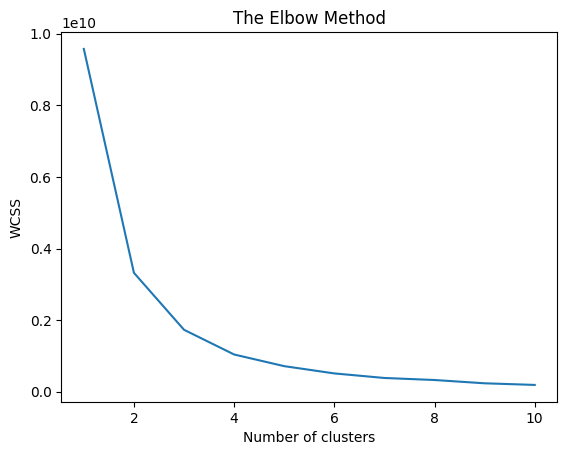

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [ ]:
#we can conclude the number of clusters to be 6

In [ ]:
X = data.values

In [ ]:
X

array([[2871.  ,   30.  ,   95.7 ],
       [2765.9 ,   34.  ,   81.35],
       [3884.34,   41.  ,   94.74],
       ...,
       [5417.57,   43.  ,  100.  ],
       [2116.16,   34.  ,   62.24],
       [3079.44,   47.  ,   65.52]])

In [ ]:
km = KMeans(n_clusters=6)
y_pred = km.fit_predict(X)

In [ ]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [ ]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()
